https://github.com/4GeeksAcademy/Hector-decision-tree.git

In [19]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, DecisionTreeRegressor
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.datasets import fetch_california_housing
from pickle import dump

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
df.shape

(768, 9)

In [22]:
df = df.drop_duplicates().reset_index(drop = True)
df.shape

(768, 9)

In [23]:
#Haremos la seleccion de los datos de entenaminenot y test
#En este caso no es necesario normalizar las variables
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [24]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50


In [25]:
#Lo convertiremos a CSV
'''
X_train_csv=X_train
X_test_csv=X_test
X_train_csv["Outcome"] = y_train.values
X_test_csv["Outcome"] = y_test.values
X_train_csv.to_csv("../data/processed/clean_train.csv", index = False)
X_test_csv.to_csv("../data/processed/clean_test.csv", index = False)
'''

'\nX_train_csv=X_train\nX_test_csv=X_test\nX_train_csv["Outcome"] = y_train.values\nX_test_csv["Outcome"] = y_test.values\nX_train_csv.to_csv("../data/processed/clean_train.csv", index = False)\nX_test_csv.to_csv("../data/processed/clean_test.csv", index = False)\n'

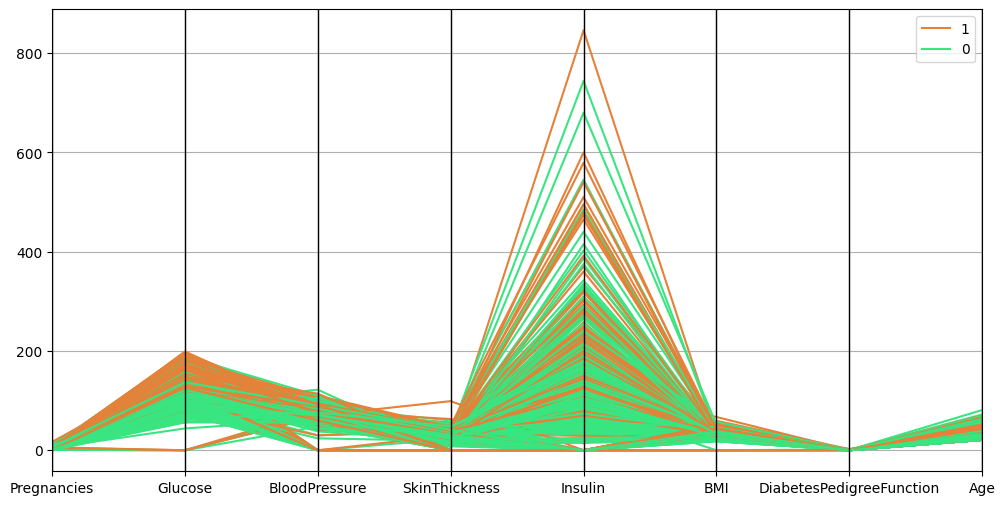

In [26]:
#Realizaremos una observacion previa a la realizaciondel modelo
plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(df, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

In [27]:
#Modelaremos el arbol de decision
complex_tree = DecisionTreeClassifier(max_depth=100, min_samples_leaf=1, random_state=42).fit(X_train, y_train)
simple_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, max_features=X_train.shape[1]//2, random_state=42).fit(X_train, y_train)

y_pred_train_complex = complex_tree.predict(X_train)
y_pred_test_complex = complex_tree.predict(X_test)

y_pred_train_simple = simple_tree.predict(X_train)
y_pred_test_simple = simple_tree.predict(X_test)

In [28]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])
    return metrics_df

In [29]:
get_metrics(y_train, y_test, y_pred_train_complex, y_pred_test_complex)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.000000,1.000,1.000000,1.000000
Test,0.746753,0.672269,0.742424,0.625,0.727273,0.757576
Diferencia,0.253247,0.327731,0.257576,0.375,0.272727,0.242424


In [30]:
get_metrics(y_train, y_test, y_pred_train_simple, y_pred_test_simple)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.737785,0.663883,0.739823,0.597744,0.746479,0.733167
Test,0.636364,0.594203,0.660606,0.493976,0.745455,0.575758
Diferencia,0.101421,0.069680,0.079217,0.103768,0.001024,0.157410


Tiene mayor robusted el test predict simple

[Text(0.5, 0.875, 'Age <= 28.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]\nclass = M'),
 Text(0.25, 0.625, 'Glucose <= 127.5\ngini = 0.304\nsamples = 300\nvalue = [244, 56]\nclass = M'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'BMI <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]\nclass = M'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]\nclass = M'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]\nclass = M'),
 Text(0.375, 0.375, 'SkinThickness <= 31.5\ngini = 0.5\nsamples = 79\nvalue = [40, 39]\nclass = M'),
 Text(0.3125, 0.125, 'gini = 0.471\nsamples = 50\nvalue = [31, 19]\nclass = M'),
 Text(0.4375, 0.125, 'gini = 0.428\nsamples = 29\nvalue = [9, 20]\nclass = B'),
 Text(0.75, 0.625, 'BMI <= 27.85\ngini = 0.5\nsamples = 314\nvalue = [157, 157]\nclass = M'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Glucose <= 123.0\ngini = 0.358\nsamples = 77\nvalue = [59, 18]\nclass = M'),
 Text(0.5625, 0.125, 'gini = 0.17

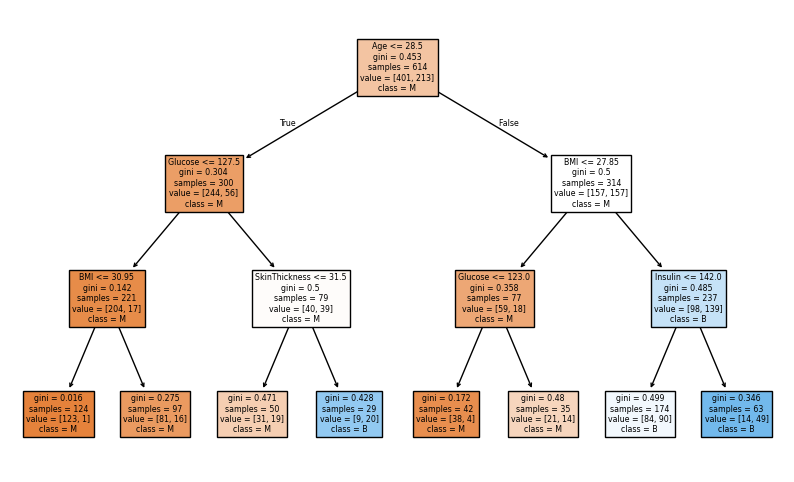

In [31]:
#Mostraremos los datos del arbol simple
plt.figure(figsize=(10,6))
plot_tree(simple_tree, feature_names=list(X_train.columns), class_names=['M', 'B'], filled=True)

In [32]:
#Analizacermos las predicciones
y_pred = simple_tree.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [33]:
accuracy_score(y_test, y_pred)

0.6363636363636364

In [34]:
#Guradadod del modelo
'''
dump(simple_tree, open("../models/tree_classifier_crit-entro_maxdepth-5_minleaf-4_minsplit2_42.sav", "wb"))
'''

'\ndump(simple_tree, open("../models/tree_classifier_crit-entro_maxdepth-5_minleaf-4_minsplit2_42.sav", "wb"))\n'